# Data In Hand
### Anthony Furiga
##### November 22nd, 2024

In [2]:
import json
import pandas as pd

In [3]:
weather1950 = pd.read_csv('Data Final Project/weather1950.csv')
weather1960 = pd.read_csv('Data Final Project/weather1960.csv')
weather1970 = pd.read_csv('Data Final Project/weather1970.csv')
weather1980 = pd.read_csv('Data Final Project/weather1980.csv')
weather1990 = pd.read_csv('Data Final Project/weather1990.csv')
weather2000 = pd.read_csv('Data Final Project/weather2000.csv')
weather2010 = pd.read_csv('Data Final Project/weather2010.csv')

Loading in my CSV files with pandas.

In [4]:
weather1950.head()

,STATION,NAME,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-01,0.01,0.0,0.0,NaN,48,41
1,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-02,0.48,0.0,0.0,NaN,55,47
2,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-03,0.53,0.0,0.0,NaN,61,52
3,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-04,0.70,0.0,0.0,NaN,57,28
4,USW00014820,"CLEVELAND HOPKINS INTERNATIONAL AIRPORT, OH US",1950-01-05,0.08,0.4,0.0,NaN,32,24


I have shown the data frame of one of my CSV files.  Each CSV file has weather information for ten years starting from January 1st, 1950.  However, the weather_2010 CSV file has weather info from January 2nd, 2010 (accounting for off-by-one) to November 20th, 2024, as that was the most recent I could get info from the website and I didn't want another CSV file to load in and eventually have to merge into one single data frame.  

I got my data from the National Centers For Environmental Information, which has free data for download on weather information for any location in the US.  They provide resources about weather and climate information that is reliable for anyone to access.  And from what I could tell, they collect their own information.  I could only download up to "1,000 station years" worth of data, which is why I had to request multiple CSV files.  I still do not know what the difference between a station year and a normal year is.

Here is the link to which you can request the data: https://www.ncdc.noaa.gov/cdo-web/search

The tutorial for requesting data from the website can be found here: https://www.climate.gov/maps-data/dataset/past-weather-zip-code-data-table

Looking at the data frame, here is what the column names represent:
* Station: This is a code of the station that the data was pulled from.
* Name: Name of the city the station is located in.
* Latitude: Latitude coordinate of the station.
* Longitude: Longitude coordinate of the station.
* Elevation: Elevation of station above sea level in meters.
* Date: Date of observation.
* DAPR: Number of days included in the multiday precipitation total.  Shows NaN since we have information for every single day.
* MDPRL: Multiday Precipitation Total: Shows NaN since we have information for every single day.
* PRCP: Precipitation, measured in inches.
* SNOW: Snowfall, measured in inches.
* SNWD: Snowdepth (Snow on ground), measured in inches.
* TAVG: Average of hourly vaules for temperatures. Shows NaN as we don't have information on hourly temperatures.
* TMAX: Temperature max, measured in Fahrenheit.
* TMIN: Temperature minimum, measured in Fahrenheit.
* TOBS: Temperature when station recorded data, measured in Fahrenheit.

# Analysis Plan
### Anthony Furiga
##### November 26nd, 2024

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [29]:
only1950 = pd.read_csv('Data Final Project/weatheronly1950.csv')
only2023 = pd.read_csv('Data Final Project/weatheronly2023.csv')

I wanted to begin by stating that upon trying to complete this assignment, my data that I collected for the first part of this final project was bad.  When I was downloading data for Cleveland, the website pulled data from multiple weather stations over the years, and each station recorded data differently than others.  This was also due to stations opening/closing during the timeframe of my data.  Because of this, I identified a station that has been operating during my timeframe and my data was collected from the same station instead of multiple.

I will clean up the first part of the final project more before the final turn in of this assignment.

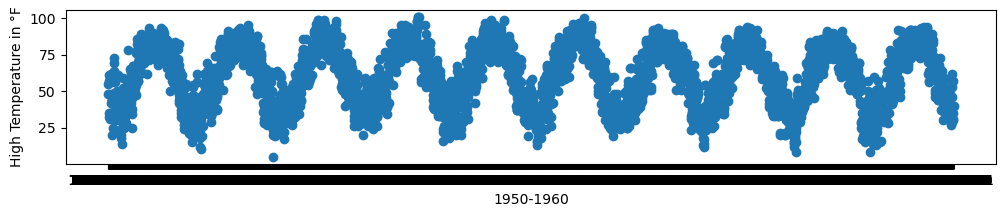

In [22]:
fig1, ax1 = plt.subplots(figsize = (12,2))
ax1.scatter(x = weather1950['DATE'], y = weather1950['TMAX'])
ax1.set_xlabel('1950-1960')
ax1.set_ylabel('High Temperature in °F')
plt.show()

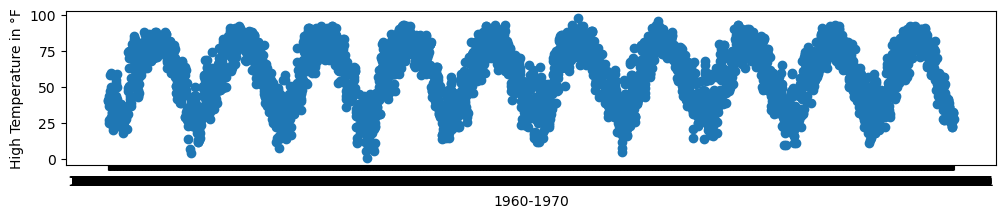

In [23]:
fig2, ax2 = plt.subplots(figsize = (12,2))
ax2.scatter(x = weather1960['DATE'], y = weather1960['TMAX'])
ax2.set_xlabel('1960-1970')
ax2.set_ylabel('High Temperature in °F')
plt.show()

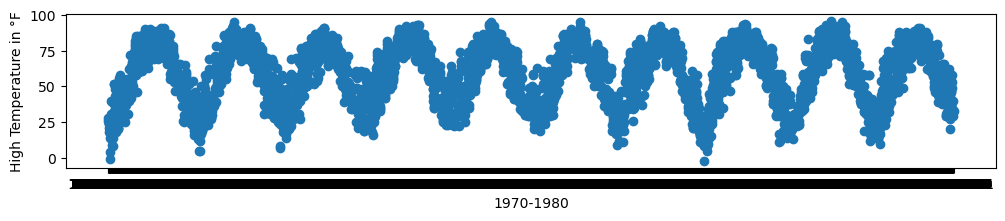

In [24]:
fig3, ax3 = plt.subplots(figsize = (12,2))
ax3.scatter(x = weather1970['DATE'], y = weather1970['TMAX'])
ax3.set_xlabel('1970-1980')
ax3.set_ylabel('High Temperature in °F')
plt.show()

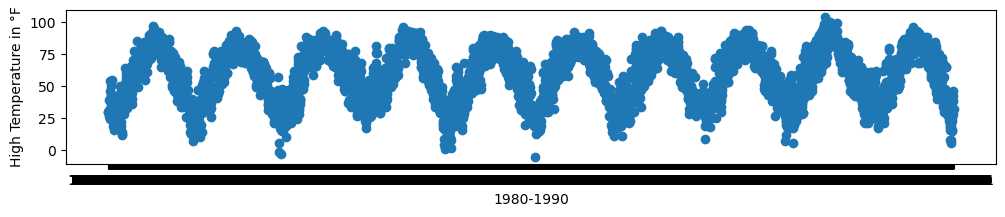

In [25]:
fig4, ax4 = plt.subplots(figsize = (12,2))
ax4.scatter(x = weather1980['DATE'], y = weather1980['TMAX'])
ax4.set_xlabel('1980-1990')
ax4.set_ylabel('High Temperature in °F')
plt.show()

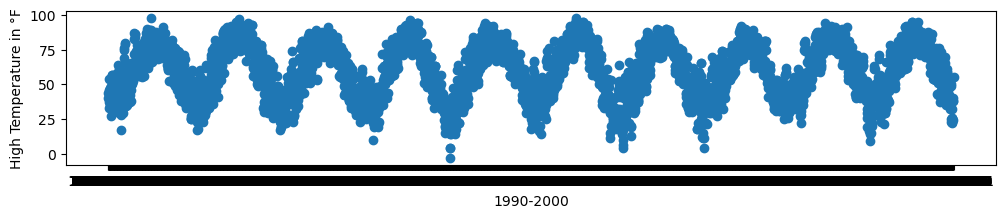

In [26]:
fig5, ax5 = plt.subplots(figsize = (12,2))
ax5.scatter(x = weather1990['DATE'], y = weather1990['TMAX'])
ax5.set_xlabel('1990-2000')
ax5.set_ylabel('High Temperature in °F')
plt.show()

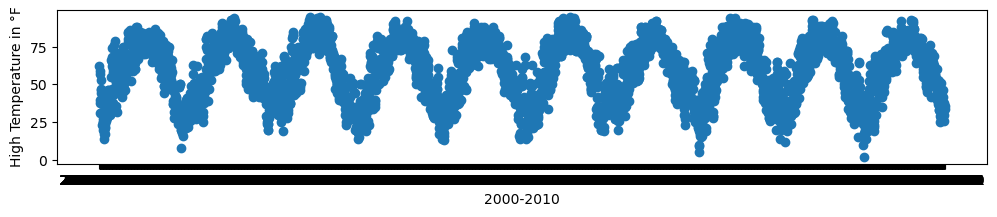

In [27]:
fig6, ax6 = plt.subplots(figsize = (12,2))
ax6.scatter(x = weather2000['DATE'], y = weather2000['TMAX'])
ax6.set_xlabel('2000-2010')
ax6.set_ylabel('High Temperature in °F')
plt.show()

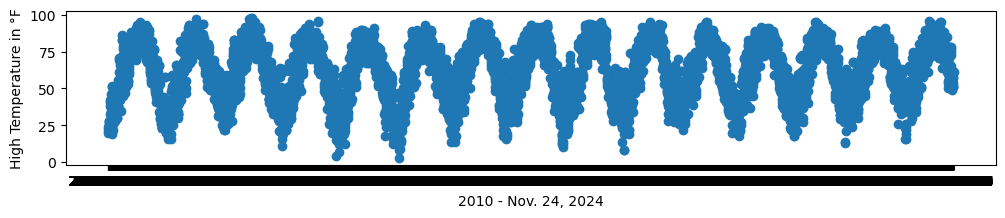

In [28]:
fig7, ax7 = plt.subplots(figsize = (12,2))
ax7.scatter(x = weather2010['DATE'], y = weather2010['TMAX'])
ax7.set_xlabel('2010 - Nov. 24, 2024')
ax7.set_ylabel('High Temperature in °F')
plt.show()

Above are graphs of the high temperatures recorded from 1950 - Nov. 24, 2024, divided up into decades.  Generally speaking, there does not seem to be any discrepancies with those recorded temperatures, but I will examine closer below.

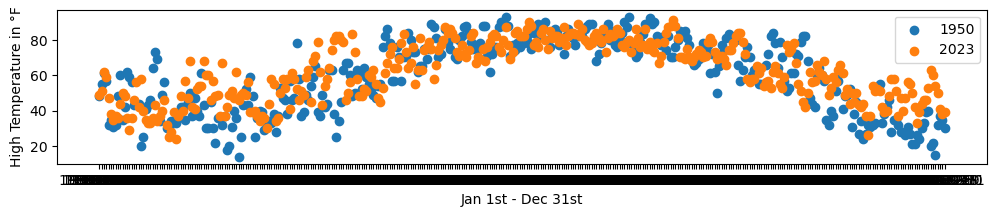

In [34]:
fig8, ax8 = plt.subplots(figsize = (12,2))
ax8.scatter(x = only1950['DATE'], y = only1950['TMAX'])
ax8.scatter(x = only1950['DATE'], y = only2023['TMAX'])
ax8.set_xlabel('Jan 1st - Dec 31st')
ax8.set_ylabel('High Temperature in °F')
ax8.legend(['1950', '2023'])
plt.show()

Shown above is a comparison of the higest temperatures from 1950 vs. 2023.  They line up pretty closely, however at the far right end of the graph getting towards November-December, 2023 has dots plotted higher on the graph, meaning the high temperature of the day has been getting hotter.  They seem to generally hang around 50°-60°, whereas in 1950 those high temperatures were closer to 30°-40°.

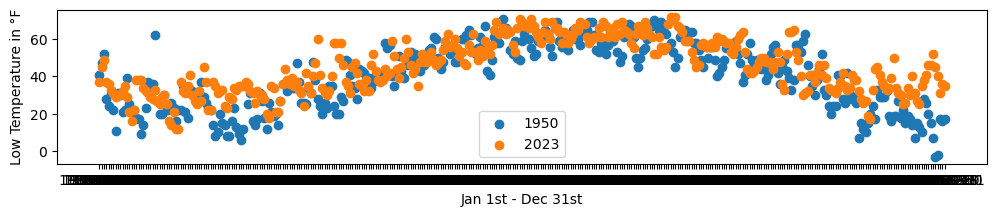

In [35]:
fig9, ax9 = plt.subplots(figsize = (12,2))
ax9.scatter(x = only1950['DATE'], y = only1950['TMIN'])
ax9.scatter(x = only1950['DATE'], y = only2023['TMIN'])
ax9.set_xlabel('Jan 1st - Dec 31st')
ax9.set_ylabel('Low Temperature in °F')
ax9.legend(['1950', '2023'])
plt.show()

This graph shows the low temperature comparison of the same set of data, and just like the graph above, we can see near November-December that 2023 has higher low temperatures than in 1950.

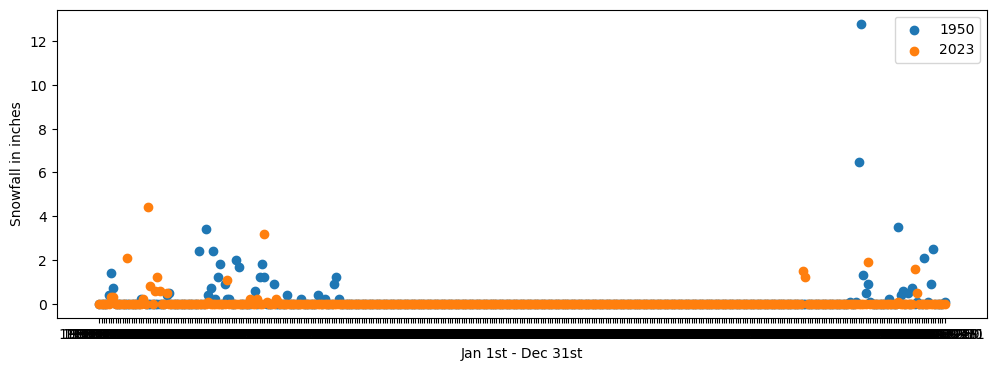

In [44]:
fig10, ax10 = plt.subplots(figsize = (12,4))
ax10.scatter(x = only1950['DATE'], y = only1950['SNOW'])
ax10.scatter(x = only1950['DATE'], y = only2023['SNOW'])
ax10.set_xlabel('Jan 1st - Dec 31st')
ax10.set_ylabel('Snowfall in inches')
ax10.legend(['1950', '2023'])
plt.show()

Above is a graph of the recorded snowfall from 1950 & 2023.  What is interesting is besides the two outlier points from 1950, 2023 has more recorded 0.0 snowfall days as compared to 1950.  This means it snowed less than in 2023, than 1950.  This could mean something, but just comparing 2 years is not enough.

I plan on doing more comparisons with specfic years, and trying to clean up my graphs as well, as they visually do not look good right now.  Hopefully, with more closer looks at specific years and other data values, I will be able to come up with a more solid answer to the question I am trying to figure out.